In [9]:
# power = 260mW 
# T = 64 C 
%matplotlib ipympl 
%load_ext autoreload 
%autoreload 2
from pianoq.lab.asi_cam import ASICam
from pianoq.lab.dmd import DMD
import numpy as np 
from pianoq.misc.mplt import mimshow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
cam = ASICam()

In [34]:
cam.close()

In [56]:
path = r'G:\My Drive\Projects\DMD\quantum\Results\Callibrations'
# cam.set_roi(4300, 2100, 500, 500)
cam.set_exposure(3)
cam.set_roi(None, None, None, None)
cam.set_binning(4)
# cam.show_image(vmin=None, vmax=None)
cam.save_image(rf'{path}\farfield_plane_yes_lens_75mm_f1_200mm.fits')

In [2]:
dmd = DMD()

Connected!
Built project!


In [60]:
dmd.set_white()

In [15]:
dmd.shape

(1140, 912)

In [ ]:
# pump with f=75mm 
mask = np.ones(dmd.shape, dtype=np.uint8)
mask[:200, :] = 0 
mask[700:, :] = 0 
mask[:, :350] = 0 
mask[:, 600:] = 0 
dmd.set_image(mask)

In [38]:
mask = np.ones(dmd.shape, dtype=np.uint8)
# mask[:200, :] = 0 
# mask[700:, :] = 0 
# mask[:, :350] = 0 
# mask[:, 600:] = 0 
dmd.set_image(mask)

In [54]:
# dmd.set_grating(30, phase=3)
mask = dmd.get_grating(150, 0)
# mimshow(mask)
dmd.set_image(mask)

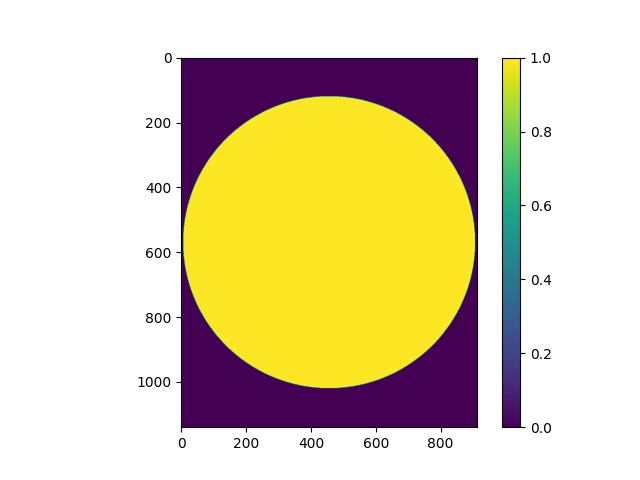

(<Figure size 640x480 with 2 Axes>, <Axes: >)

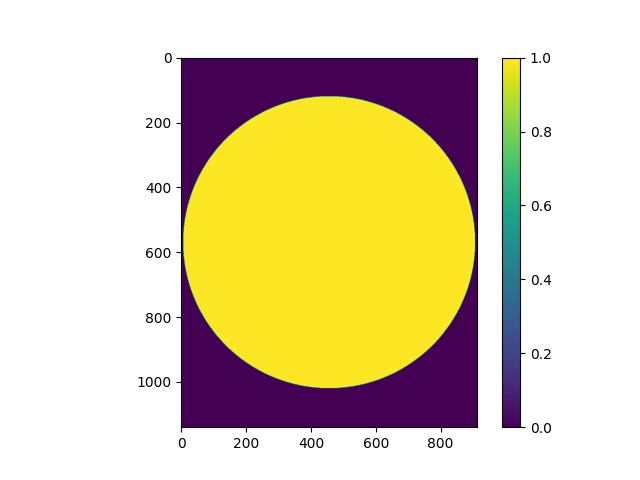

In [ ]:
r = 450
X0 = 0
Y0 = 0
mask = np.zeros(dmd.shape, dtype=np.uint8)
mask[np.sqrt((dmd.XX-X0)**2+(dmd.YY-Y0)**2) < r] = 1 
dmd.set_image(mask)
# mimshow(mask)

In [25]:
dmd.set_black()

In [12]:
dmd.set_grating(500)

In [373]:
dmd.close()

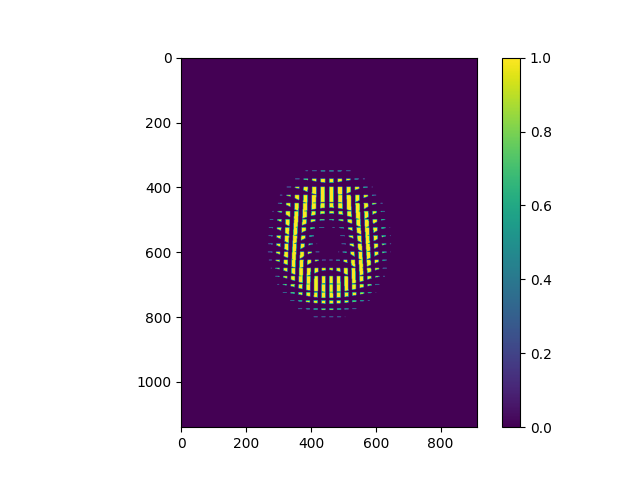

(<Figure size 640x480 with 2 Axes>, <Axes: >)

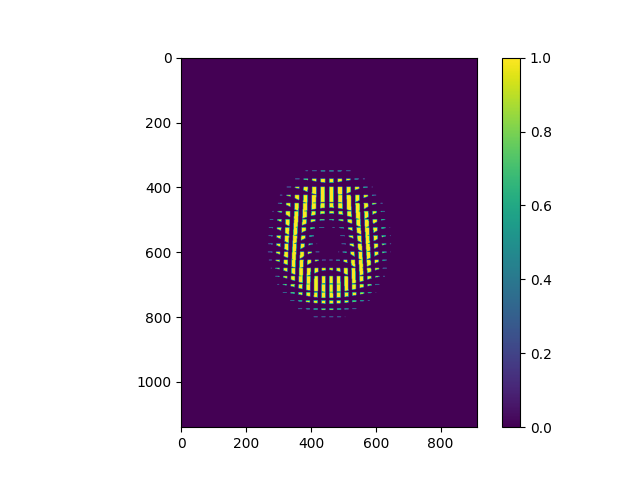

In [68]:
from pianoq.lab.lee_holo.generate_lee import main, make_oam_donut, orthogonal_lee
GRATING_PERIOD_PX = 25            # p (pixels)  ⇒ ν = 1/p cycles/pixel
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)  # along +x by default

target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=2, r0=0.25)
# target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=0, r0=0.0, sigma=0.2)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))
mimshow(hologram)